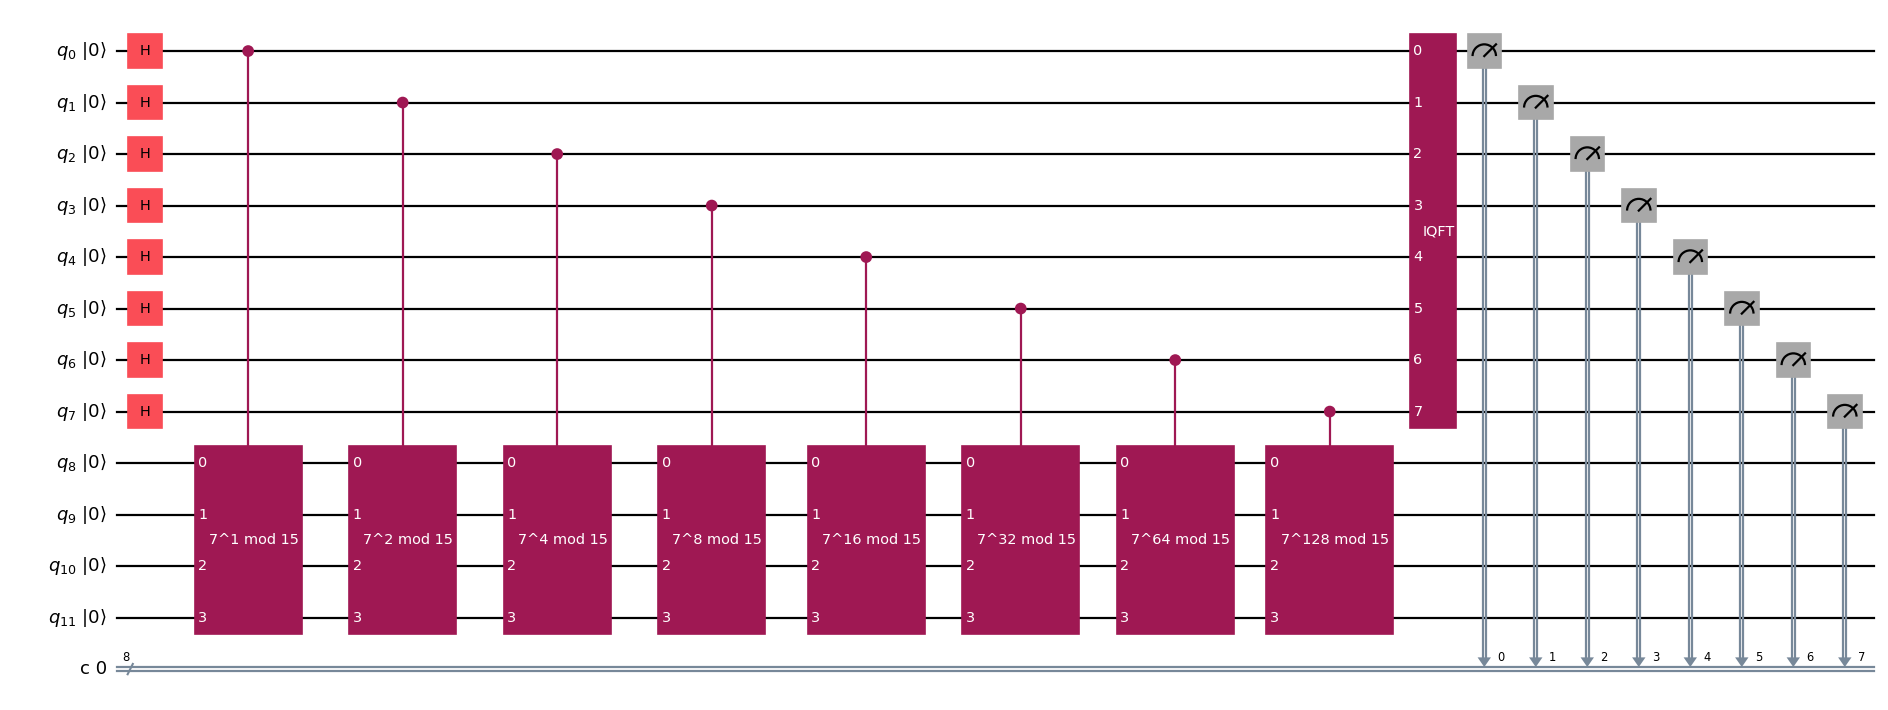

Quantum circuit for Shor's algorithm


In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit_aer import Aer  # Updated import for Aer
from qiskit.visualization import circuit_drawer
import numpy as np

# Parameters
N = 15  # Number to factor
a = 7   # Coprime base
t = 8   # Number of qubits in period register (2*log2(N))
n = 4   # Number of qubits in function register (log2(N))

# Create circuit
qc = QuantumCircuit(t + n, t)

# Step 1: Hadamard gates on period register
qc.h(range(t))
qc.barrier()

# Step 2: Modular exponentiation (a^x mod N)
def c_amod15(a, power):
    """Controlled multiplication by a^power mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be coprime with 15")
    U = QuantumCircuit(4)
    for _ in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4,11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

# Apply controlled-U operations
for qubit in range(t):
    qc.append(c_amod15(a, 2**qubit), 
             [qubit] + list(range(t, t+n)))
qc.barrier()

# Step 3: Apply inverse QFT
qc.append(QFT(t, inverse=True), range(t))

# Measure period register
qc.measure(range(t), range(t))

# Draw the circuit
display(qc.draw('mpl', scale=0.8, style='iqp', 
               plot_barriers=False,
               initial_state=True,
               fold=-1))

# Simulate
try:
    from qiskit import transpile
    from qiskit.providers.aer import QasmSimulator
    
    # Use Aer's qasm_simulator
    simulator = QasmSimulator()
    
    # Transpile circuit for simulator
    compiled_circuit = transpile(qc, simulator)
    
    # Execute and get counts
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    
    # Plot histogram
    display(plot_histogram(counts))
except ImportError:
    print("Quantum circuit for Shor's algorithm")

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit_aer import Aer  # Updated import for Aer
from qiskit.visualization import circuit_drawer
import numpy as np

# Parameters
N = 15  # Number to factor
a = 7   # Coprime base
t = 8   # Number of qubits in period register (2*log2(N))
n = 4   # Number of qubits in function register (log2(N))

# Create circuit
qc = QuantumCircuit(t + n, t)

# Step 1: Hadamard gates on period register
qc.h(range(t))
qc.barrier()

# Step 2: Modular exponentiation (a^x mod N)
def c_amod15(a, power):
    """Controlled multiplication by a^power mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be coprime with 15")
    U = QuantumCircuit(4)
    for _ in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4,11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

# Apply controlled-U operations
for qubit in range(t):
    qc.append(c_amod15(a, 2**qubit), 
             [qubit] + list(range(t, t+n)))
qc.barrier()

# Step 3: Apply inverse QFT
qc.append(QFT(t, inverse=True), range(t))

# Measure period register
qc.measure(range(t), range(t))

# Draw the circuit
display(qc.draw('mpl', scale=0.8, style='iqp', 
               plot_barriers=False,
               initial_state=True,
               fold=-1))

# Simulate
try:
    from qiskit import transpile
    from qiskit.providers.aer import QasmSimulator
    
    # Use Aer's qasm_simulator
    simulator = QasmSimulator()
    
    # Transpile circuit for simulator
    compiled_circuit = transpile(qc, simulator)
    
    # Execute and get counts
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    
    # Plot histogram
    display(plot_histogram(counts))
except ImportError:
    print("Quantum circuit for Shor's algorithm")